In [1]:
import pandas as pd

df = pd.read_csv(r'..\univariate_automation\airline_satisfaction.csv')
print(df.shape)
df.head()

(129880, 23)


satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

In [2]:
# drop missing data
df.dropna(inplace=True) # <-- can't have any missing data or else the model tree doesn't work

In [3]:
y = df['satisfaction']
X = df.drop(columns=['satisfaction'])
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0   65              265             0                                  0   
1   47             2464             0                                  0   
2   15             2138             0                                  0   
3   60              623             0                                  0   
4   70              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight entertainment  Online support  Ease of Online booking  ...  \
0                       4               2                       3  ...   
1                       2               2                       3  ...   
2                       0               2                       2  ...   
3                       4               3                       1  ...   
4                       3               4                       2  ...   

   Checkin service  Cleanliness  Online boarding  Departure Delay in Minutes  \
0                5            3                2                           0   
1                2            3                2                         310   
2                4            4                2                           0   
3                4            1                3                           0   
4                4            2                5                           0   

   Arrival Delay in Minutes  Gender_Male  Customer Type_disloyal Customer  \
0                       0.0            0                                0   
1                     305.0            1                                0   
2                       0.0            0                                0   
3                       0.0            0                                0   
4                       0.0            0                                0   

   Type of Travel_Personal Travel  Class_Eco  Class_Eco Plus  
0                               1          1               0  
1                               1          0               0  
2                               1          1               0  
3                               1          1               0  
4                               1          1               0  

[5 rows x 23 columns]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90640, 23)
(38847, 23)
(90640,)
(38847,)


In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [6]:
y_pred = model.predict(X_test)

df_results = pd.DataFrame({'Actual satisfaction' : y_test, 'Predicted satisfaction' : y_pred})
df_results.head(10)

Actual satisfaction Predicted satisfaction
9718             satisfied              satisfied
85578         dissatisfied              satisfied
108836           satisfied              satisfied
89645            satisfied              satisfied
27208            satisfied              satisfied
68710         dissatisfied           dissatisfied
112976           satisfied              satisfied
10134         dissatisfied           dissatisfied
33829            satisfied           dissatisfied
14252         dissatisfied           dissatisfied

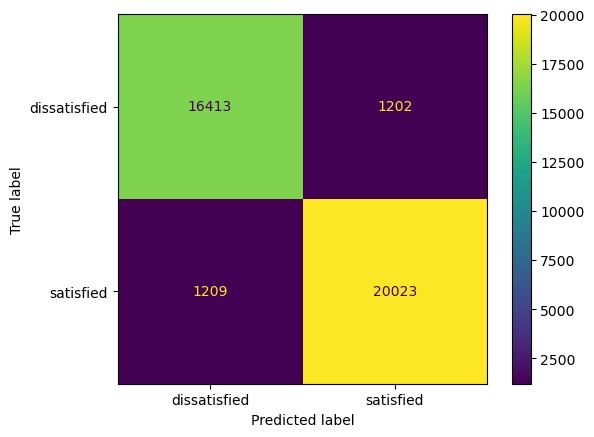

In [ ]:
#CONFUSION MATRIX

from sklearn import metrics
from matplotlib import pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['dissatisfied', 'satisfied'])
cm_display.plot(values_format='d')
plt.show()

In [9]:
from sklearn import metrics

# Several of these metrics have to work off of dummy codes rather than categorical values. Therefore:
y_test_dummies = pd.get_dummies(y_test, drop_first=True)
y_pred_dummies = pd.get_dummies(y_pred, drop_first=True)

# Accuracy  = (true positives + true negatives) / (total cases); ranges from 0 (worst) to 1 (best)
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")

# Precision = (true positives / (true positives + false positives))
print(f"Precision:\t{metrics.precision_score(y_test_dummies, y_pred_dummies)}")

# Recall    = (true positives / (true positives + false negatives)) 
print(f"Recall:\t\t{metrics.recall_score(y_test_dummies, y_pred_dummies)}")

# F1        = (2 * (precision * recall) / (precision + recall))
print(f"F1:\t\t{metrics.f1_score(y_test_dummies, y_pred_dummies)}")

Accuracy:	0.9379360053543389
Precision:	0.9433686690223793
Recall:		0.9430576488319518
F1:		0.9432131332877971


### DAY 2 ###

In [12]:
model.predict([[46, 1000, 4, 3, 4, 3, 2, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 4, 1, 0, 1, 0, 1]])

c:\Users\camde\miniconda3\envs\cs110\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['satisfied'], dtype=object)

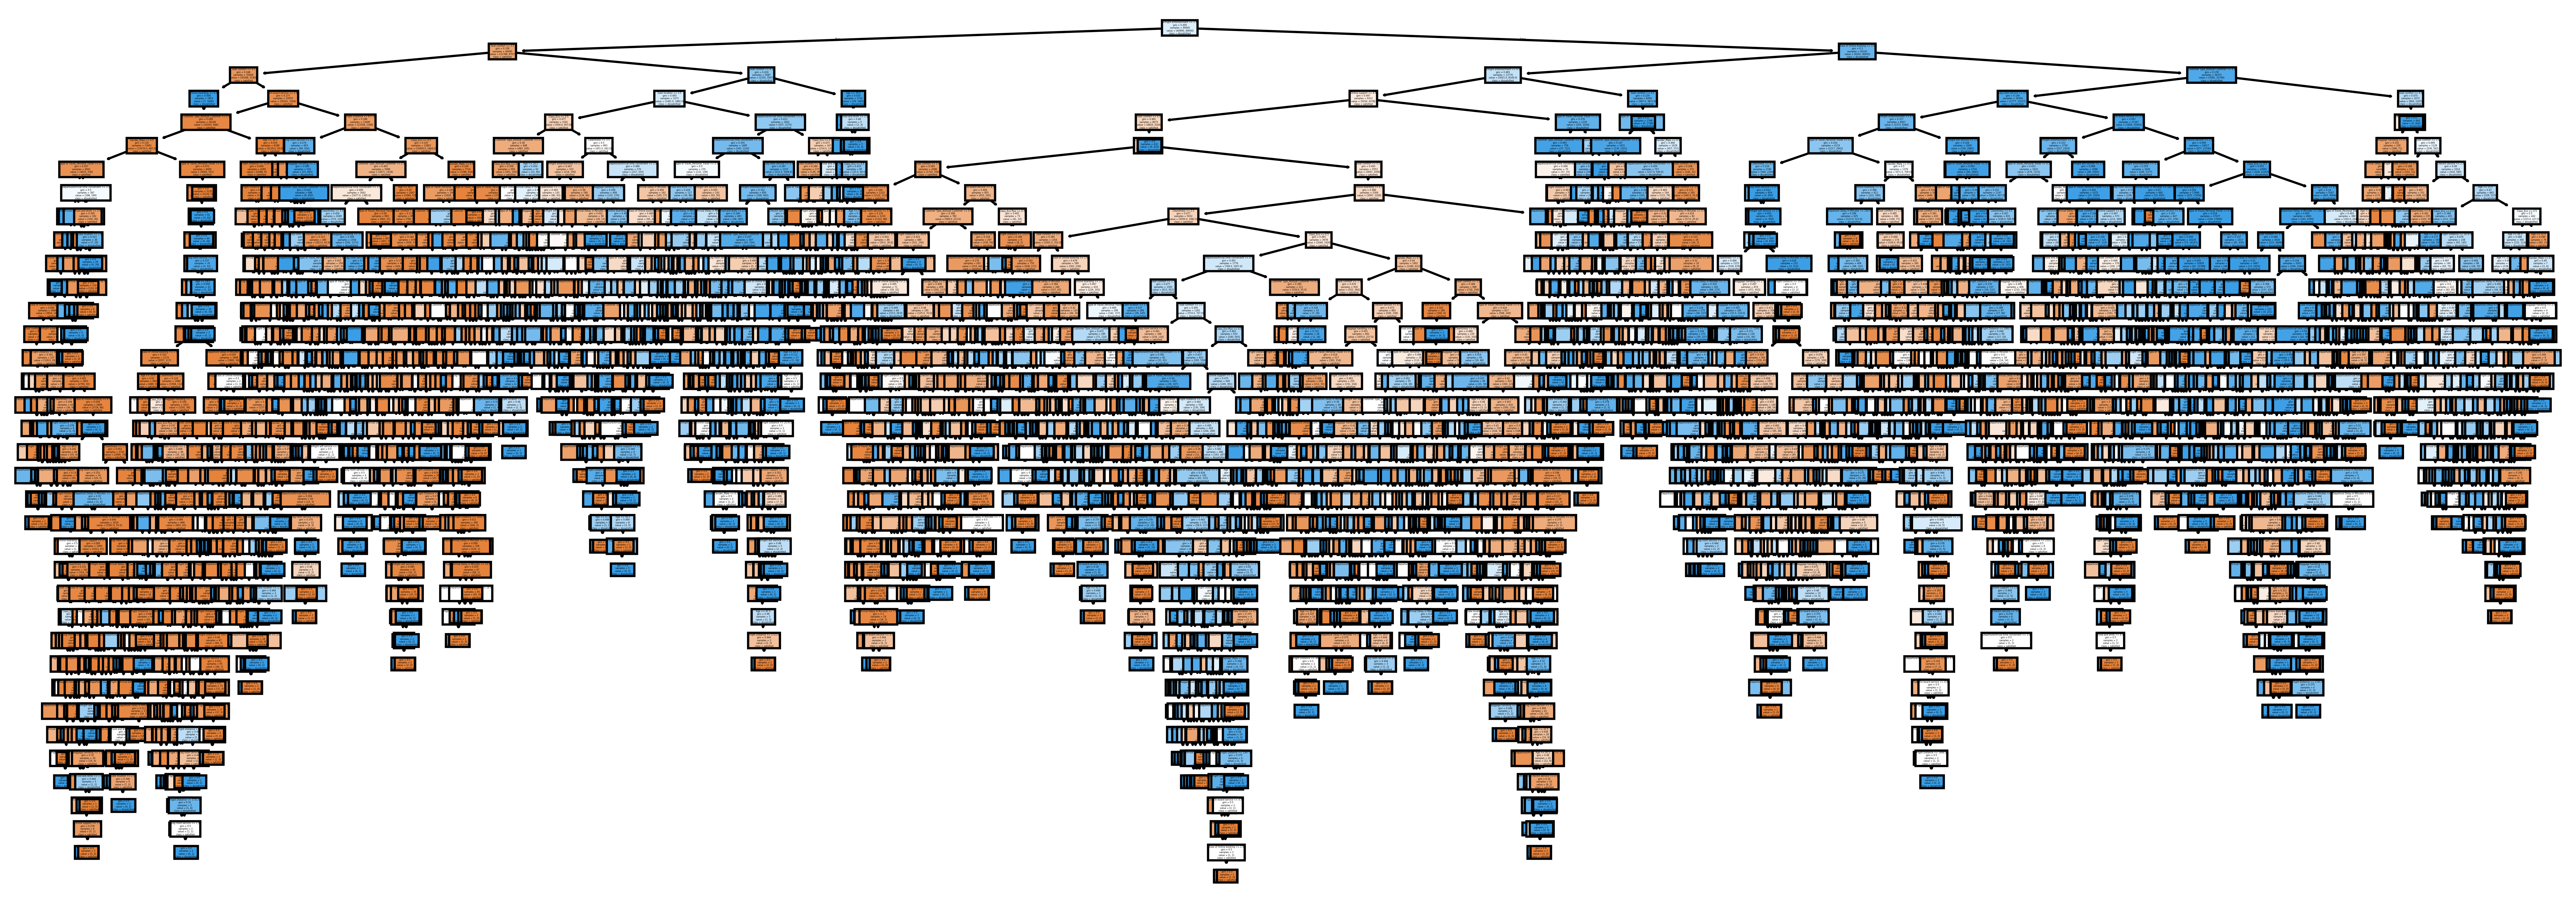

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(nrows=1, ncols=1, figsize=(20, 7), dpi=600)

tree.plot_tree(model, feature_names=X.columns, class_names=y.unique(), filled=True);

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

model = LogisticRegression(max_iter=1000).fit(X_scaled, y)

df_results = pd.DataFrame({'Coefficients':model.coef_[0]}, index=X.columns)
df_results.sort_values(by=['Coefficients'])

Coefficients
Arrival Delay in Minutes              -4.247812
Departure Delay in Minutes            -3.730636
Customer Type_disloyal Customer       -1.977309
Food and drink                        -1.077190
Departure/Arrival time convenient     -0.981142
Gender_Male                           -0.963253
Class_Eco Plus                        -0.804146
Type of Travel_Personal Travel        -0.783097
Flight Distance                       -0.779381
Class_Eco                             -0.726569
Age                                   -0.607144
Inflight wifi service                 -0.337789
Cleanliness                            0.421145
Baggage handling                       0.433791
Online support                         0.451872
Gate location                          0.566860
Online boarding                        0.874931
Ease of Online booking                 1.072728
Leg room service                       1.123496
Seat comfort                           1.431442
Checkin service                        1.478433
On-board service                       1.542502
Inflight entertainment                 3.431580

In [16]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
model.feature_importances_

array([0.02376698, 0.04020144, 0.1735153 , 0.03064859, 0.01041431,
       0.01700256, 0.00697688, 0.39378327, 0.02089521, 0.04793512,
       0.01875305, 0.01927018, 0.02106989, 0.0239907 , 0.02722977,
       0.01148928, 0.00927215, 0.01415482, 0.01937749, 0.02622214,
       0.0263953 , 0.01416587, 0.0034697 ])

In [17]:
df_results = df_results.join(pd.DataFrame({'FI':model.feature_importances_}, index=X.columns))
df_results.sort_values(by=['FI'])

Coefficients        FI
Class_Eco Plus                        -0.804146  0.003470
Inflight wifi service                 -0.337789  0.006977
Departure Delay in Minutes            -3.730636  0.009272
Food and drink                        -1.077190  0.010414
Online boarding                        0.874931  0.011489
Arrival Delay in Minutes              -4.247812  0.014155
Class_Eco                             -0.726569  0.014166
Gate location                          0.566860  0.017003
On-board service                       1.542502  0.018753
Leg room service                       1.123496  0.019270
Gender_Male                           -0.963253  0.019377
Online support                         0.451872  0.020895
Baggage handling                       0.433791  0.021070
Age                                   -0.607144  0.023767
Checkin service                        1.478433  0.023991
Customer Type_disloyal Customer       -1.977309  0.026222
Type of Travel_Personal Travel        -0.783097  0.026395
Cleanliness                            0.421145  0.027230
Departure/Arrival time convenient     -0.981142  0.030649
Flight Distance                       -0.779381  0.040201
Ease of Online booking                 1.072728  0.047935
Seat comfort                           1.431442  0.173515
Inflight entertainment                 3.431580  0.393783